### <span style = 'color:violet'> Preprocessing of MatchSummary </span>

In [1]:
#import necesary libraries
import pandas as pd
import json

In [2]:
with open('t20_json_files/t20_wc_match_results.json') as f:
    data = json.load(f)
# len(data)
# data
df_match = pd.DataFrame(data[0]['matchSummary'])
df_match.head()

,team1,team2,winner,margin,ground,matchDate,scorecard
0,Namibia,Sri Lanka,Namibia,55 runs,Geelong,"Oct 16, 2022",T20I # 1823
1,Netherlands,U.A.E.,Netherlands,3 wickets,Geelong,"Oct 16, 2022",T20I # 1825
2,Scotland,West Indies,Scotland,42 runs,Hobart,"Oct 17, 2022",T20I # 1826
3,Ireland,Zimbabwe,Zimbabwe,31 runs,Hobart,"Oct 17, 2022",T20I # 1828
4,Namibia,Netherlands,Netherlands,5 wickets,Geelong,"Oct 18, 2022",T20I # 1830


In [3]:
df_match.shape

(45, 7)

In [4]:
df_match.rename({'scorecard':'match_id'},axis = 1,inplace = True)
df_match.head()

,team1,team2,winner,margin,ground,matchDate,match_id
0,Namibia,Sri Lanka,Namibia,55 runs,Geelong,"Oct 16, 2022",T20I # 1823
1,Netherlands,U.A.E.,Netherlands,3 wickets,Geelong,"Oct 16, 2022",T20I # 1825
2,Scotland,West Indies,Scotland,42 runs,Hobart,"Oct 17, 2022",T20I # 1826
3,Ireland,Zimbabwe,Zimbabwe,31 runs,Hobart,"Oct 17, 2022",T20I # 1828
4,Namibia,Netherlands,Netherlands,5 wickets,Geelong,"Oct 18, 2022",T20I # 1830


**Create a match ids dictionary that maps team names to a unique match id. This will be useful later on to link with other tables**

In [5]:
match_ids_dict = {}
for index,row in df_match.iterrows():
    key1 = row['team1'] + ' Vs ' + row['team2']
    key2 = row['team2'] + ' Vs ' + row['team1']
    match_ids_dict[key1] = row['match_id']
    match_ids_dict[key2] = row['match_id']
match_ids_dict

{'Namibia Vs Sri Lanka': 'T20I # 1823',
 'Sri Lanka Vs Namibia': 'T20I # 1823',
 'Netherlands Vs U.A.E.': 'T20I # 1825',
 'U.A.E. Vs Netherlands': 'T20I # 1825',
 'Scotland Vs West Indies': 'T20I # 1826',
 'West Indies Vs Scotland': 'T20I # 1826',
 'Ireland Vs Zimbabwe': 'T20I # 1828',
 'Zimbabwe Vs Ireland': 'T20I # 1828',
 'Namibia Vs Netherlands': 'T20I # 1830',
 'Netherlands Vs Namibia': 'T20I # 1830',
 'Sri Lanka Vs U.A.E.': 'T20I # 1832',
 'U.A.E. Vs Sri Lanka': 'T20I # 1832',
 'Ireland Vs Scotland': 'T20I # 1833',
 'Scotland Vs Ireland': 'T20I # 1833',
 'West Indies Vs Zimbabwe': 'T20I # 1834',
 'Zimbabwe Vs West Indies': 'T20I # 1834',
 'Netherlands Vs Sri Lanka': 'T20I # 1835',
 'Sri Lanka Vs Netherlands': 'T20I # 1835',
 'Namibia Vs U.A.E.': 'T20I # 1836',
 'U.A.E. Vs Namibia': 'T20I # 1836',
 'Ireland Vs West Indies': 'T20I # 1837',
 'West Indies Vs Ireland': 'T20I # 1837',
 'Scotland Vs Zimbabwe': 'T20I # 1838',
 'Zimbabwe Vs Scotland': 'T20I # 1838',
 'Australia Vs New Zea

In [48]:
df_match.to_csv('t20_csv_files/dim_match_summary.csv',index = False)

### <span style = 'color:violet'> Preprocessing of Batting Summary</span>

In [6]:
with open('t20_json_files/t20_wc_batting_summary.json') as f:
    data = json.load(f)
    all_records = []
    for rec in data:
        all_records.extend(rec['battingSummary'])
df_batting = pd.DataFrame(all_records)
df_batting.head()

,match,teamInnings,battingPos,batsmanName,dismissal,runs,balls,4s,6s,SR
0,Namibia Vs Sri Lanka,Namibia,1,Michael van Lingen,c Pramod Madushan b Chameera,3,6,0,0,50.00
1,Namibia Vs Sri Lanka,Namibia,2,Divan la Cock,c Shanaka b Pramod Madushan,9,9,1,0,100.00
2,Namibia Vs Sri Lanka,Namibia,3,Jan Nicol Loftie-Eaton,c â€ Mendis b Karunaratne,20,12,1,2,166.66
3,Namibia Vs Sri Lanka,Namibia,4,Stephan Baard,c DM de Silva b Pramod Madushan,26,24,2,0,108.33
4,Namibia Vs Sri Lanka,Namibia,5,Gerhard Erasmus(c),c Gunathilaka b PWH de Silva,20,24,0,0,83.33


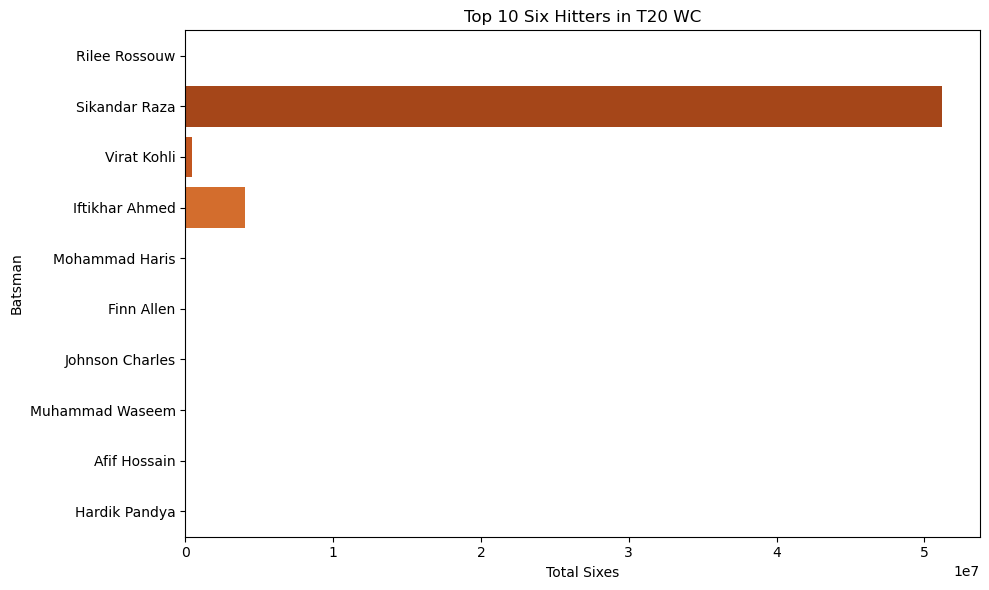

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.barplot(
    data=top_six_hitters,
    x="6s",
    y="batsmanName",
    hue="batsmanName",             # Explicitly set hue
    dodge=False,                   # Don't separate bars by hue
    legend=False,                  # Don't show legend
    palette="Oranges_r"
)
plt.title("Top 10 Six Hitters in T20 WC")
plt.xlabel("Total Sixes")
plt.ylabel("Batsman")
plt.tight_layout()
plt.show()


In [21]:
df_batting['out/not_out'] = df_batting.dismissal.apply(lambda x: 'out' if len(x) > 0 else 'not_out')
df_batting.head(11)

,match,teamInnings,battingPos,batsmanName,dismissal,runs,balls,4s,6s,SR,out/not_out
0,Namibia Vs Sri Lanka,Namibia,1,Michael van Lingen,c Pramod Madushan b Chameera,3,6,0,0,50.00,out
1,Namibia Vs Sri Lanka,Namibia,2,Divan la Cock,c Shanaka b Pramod Madushan,9,9,1,0,100.00,out
2,Namibia Vs Sri Lanka,Namibia,3,Jan Nicol Loftie-Eaton,c â€ Mendis b Karunaratne,20,12,1,2,166.66,out
3,Namibia Vs Sri Lanka,Namibia,4,Stephan Baard,c DM de Silva b Pramod Madushan,26,24,2,0,108.33,out
4,Namibia Vs Sri Lanka,Namibia,5,Gerhard Erasmus(c),c Gunathilaka b PWH de Silva,20,24,0,0,83.33,out
5,Namibia Vs Sri Lanka,Namibia,6,Jan Frylinck,run out (Gunathilaka/â€ Mendis),44,28,4,0,157.14,out
6,Namibia Vs Sri Lanka,Namibia,7,David Wiese,c â€ Mendis b Theekshana,0,1,0,0,0.00,out
7,Namibia Vs Sri Lanka,Namibia,8,JJ Smit,,31,16,2,2,193.75,not_out
8,Namibia Vs Sri Lanka,Sri Lanka,1,Pathum Nissanka,c Smit b Shikongo,9,10,1,0,90.00,out
9,Namibia Vs Sri Lanka,Sri Lanka,2,Kusal Mendisâ€,c â€ Green b Wiese,6,6,0,0,100.00,out


In [30]:
# dropping dismissal
df_batting.drop(columns=['dismissal'],inplace = True)
df_batting.head(11)

,match,teamInnings,battingPos,batsmanName,runs,balls,4s,6s,SR,out/not_out
0,Namibia Vs Sri Lanka,Namibia,1,Michael van Lingen,3,6,0,0,50.00,out
1,Namibia Vs Sri Lanka,Namibia,2,Divan la Cock,9,9,1,0,100.00,out
2,Namibia Vs Sri Lanka,Namibia,3,Jan Nicol Loftie-Eaton,20,12,1,2,166.66,out
3,Namibia Vs Sri Lanka,Namibia,4,Stephan Baard,26,24,2,0,108.33,out
4,Namibia Vs Sri Lanka,Namibia,5,Gerhard Erasmus(c),20,24,0,0,83.33,out
5,Namibia Vs Sri Lanka,Namibia,6,Jan Frylinck,44,28,4,0,157.14,out
6,Namibia Vs Sri Lanka,Namibia,7,David Wiese,0,1,0,0,0.00,out
7,Namibia Vs Sri Lanka,Namibia,8,JJ Smit,31,16,2,2,193.75,not_out
8,Namibia Vs Sri Lanka,Sri Lanka,1,Pathum Nissanka,9,10,1,0,90.00,out
9,Namibia Vs Sri Lanka,Sri Lanka,2,Kusal Mendisâ€,6,6,0,0,100.00,out


In [32]:
# cleaning
df_batting['batsmanName'] = df_batting.batsmanName.apply(lambda x : x.replace('â€',''))
df_batting['batsmanName'] = df_batting.batsmanName.apply(lambda x : x.replace('\xa0',''))
df_batting.head(11)

,match,teamInnings,battingPos,batsmanName,runs,balls,4s,6s,SR,out/not_out
0,Namibia Vs Sri Lanka,Namibia,1,Michael van Lingen,3,6,0,0,50.00,out
1,Namibia Vs Sri Lanka,Namibia,2,Divan la Cock,9,9,1,0,100.00,out
2,Namibia Vs Sri Lanka,Namibia,3,Jan Nicol Loftie-Eaton,20,12,1,2,166.66,out
3,Namibia Vs Sri Lanka,Namibia,4,Stephan Baard,26,24,2,0,108.33,out
4,Namibia Vs Sri Lanka,Namibia,5,Gerhard Erasmus(c),20,24,0,0,83.33,out
5,Namibia Vs Sri Lanka,Namibia,6,Jan Frylinck,44,28,4,0,157.14,out
6,Namibia Vs Sri Lanka,Namibia,7,David Wiese,0,1,0,0,0.00,out
7,Namibia Vs Sri Lanka,Namibia,8,JJ Smit,31,16,2,2,193.75,not_out
8,Namibia Vs Sri Lanka,Sri Lanka,1,Pathum Nissanka,9,10,1,0,90.00,out
9,Namibia Vs Sri Lanka,Sri Lanka,2,Kusal Mendis,6,6,0,0,100.00,out


##### Adding new col matchID using match_id_dict

In [64]:
#Finds the same key(match) from dict and maps it's value into new col
df_batting['match_id'] = df_batting['match'].map(match_ids_dict)
df_batting.head()

,match,teamInnings,battingPos,batsmanName,runs,balls,4s,6s,SR,out/not_out,match_id
0,Namibia Vs Sri Lanka,Namibia,1,Michael van Lingen,3,6,0,0,50.00,out,T20I # 1823
1,Namibia Vs Sri Lanka,Namibia,2,Divan la Cock,9,9,1,0,100.00,out,T20I # 1823
2,Namibia Vs Sri Lanka,Namibia,3,Jan Nicol Loftie-Eaton,20,12,1,2,166.66,out,T20I # 1823
3,Namibia Vs Sri Lanka,Namibia,4,Stephan Baard,26,24,2,0,108.33,out,T20I # 1823
4,Namibia Vs Sri Lanka,Namibia,5,Gerhard Erasmus(c),20,24,0,0,83.33,out,T20I # 1823


In [66]:
df_batting.to_csv('t20_csv_files/fact_batting_summary.csv',index = False)

### <span style = 'color:violet'> Preprocessing for bowling summary </span>

In [68]:
with open('t20_json_files/t20_wc_bowling_summary.json') as f:
    data = json.load(f)
    all_records = []
    for rec in data:
        all_records.extend(rec['bowlingSummary'])
all_records[:2]

[{'match': 'Namibia Vs Sri Lanka',
  'bowlingTeam': 'Sri Lanka',
  'bowlerName': 'Maheesh Theekshana',
  'overs': '4',
  'maiden': '0',
  'runs': '23',
  'wickets': '1',
  'economy': '5.75',
  '0s': '7',
  '4s': '0',
  '6s': '0',
  'wides': '2',
  'noBalls': '0'},
 {'match': 'Namibia Vs Sri Lanka',
  'bowlingTeam': 'Sri Lanka',
  'bowlerName': 'Dushmantha Chameera',
  'overs': '4',
  'maiden': '0',
  'runs': '39',
  'wickets': '1',
  'economy': '9.75',
  '0s': '6',
  '4s': '3',
  '6s': '1',
  'wides': '2',
  'noBalls': '0'}]

In [69]:
df_bowling = pd.DataFrame(all_records)
df_bowling.head()

,match,bowlingTeam,bowlerName,overs,maiden,runs,wickets,economy,0s,4s,6s,wides,noBalls
0,Namibia Vs Sri Lanka,Sri Lanka,Maheesh Theekshana,4,0,23,1,5.75,7,0,0,2,0
1,Namibia Vs Sri Lanka,Sri Lanka,Dushmantha Chameera,4,0,39,1,9.75,6,3,1,2,0
2,Namibia Vs Sri Lanka,Sri Lanka,Pramod Madushan,4,0,37,2,9.25,6,3,1,0,0
3,Namibia Vs Sri Lanka,Sri Lanka,Chamika Karunaratne,4,0,36,1,9.00,7,3,1,1,0
4,Namibia Vs Sri Lanka,Sri Lanka,Wanindu Hasaranga de Silva,4,0,27,1,6.75,8,1,1,0,0


In [71]:
df_bowling['match_id'] = df_bowling['match'].map(match_ids_dict)
df_bowling.head()

,match,bowlingTeam,bowlerName,overs,maiden,runs,wickets,economy,0s,4s,6s,wides,noBalls,match_id
0,Namibia Vs Sri Lanka,Sri Lanka,Maheesh Theekshana,4,0,23,1,5.75,7,0,0,2,0,T20I # 1823
1,Namibia Vs Sri Lanka,Sri Lanka,Dushmantha Chameera,4,0,39,1,9.75,6,3,1,2,0,T20I # 1823
2,Namibia Vs Sri Lanka,Sri Lanka,Pramod Madushan,4,0,37,2,9.25,6,3,1,0,0,T20I # 1823
3,Namibia Vs Sri Lanka,Sri Lanka,Chamika Karunaratne,4,0,36,1,9.00,7,3,1,1,0,T20I # 1823
4,Namibia Vs Sri Lanka,Sri Lanka,Wanindu Hasaranga de Silva,4,0,27,1,6.75,8,1,1,0,0,T20I # 1823


In [72]:
df_bowling.to_csv('t20_csv_files/fact_bowling_summary.csv',index=False)

### <span style = 'color:violet'> Preprocessing for playerInfo</span>

In [73]:
with open('t20_json_files/t20_wc_player_info.json') as f:
    data = json.load(f)
df_players = pd.DataFrame(data)
print(df_players.shape)
df_players.head()

(219, 6)


,name,team,battingStyle,bowlingStyle,playingRole,description
0,Michael van Lingen,Namibia,Left hand Bat,Left arm Medium,Bowling Allrounder,
1,Divan la Cock,Namibia,Right hand Bat,Legbreak,Opening Batter,
2,Jan Nicol Loftie-Eaton,Namibia,Left hand Bat,"Right arm Medium, Legbreak",Batter,
3,Stephan Baard,Namibia,Right hand Bat,Right arm Medium fast,Batter,
4,Gerhard Erasmus(c),Namibia,Right hand Bat,Right arm Offbreak,Allrounder,


In [76]:
#Cleaning
df_players['name'] = df_players.name.apply(lambda x: x.replace('â€',''))
df_players['name'] = df_players.name.apply(lambda x: x.replace('†',''))
df_players['name'] = df_players.name.apply(lambda x: x.replace('\xa0',''))
df_players.head(10)

,name,team,battingStyle,bowlingStyle,playingRole,description
0,Michael van Lingen,Namibia,Left hand Bat,Left arm Medium,Bowling Allrounder,
1,Divan la Cock,Namibia,Right hand Bat,Legbreak,Opening Batter,
2,Jan Nicol Loftie-Eaton,Namibia,Left hand Bat,"Right arm Medium, Legbreak",Batter,
3,Stephan Baard,Namibia,Right hand Bat,Right arm Medium fast,Batter,
4,Gerhard Erasmus(c),Namibia,Right hand Bat,Right arm Offbreak,Allrounder,
5,Jan Frylinck,Namibia,Left hand Bat,Left arm Fast medium,Allrounder,
6,David Wiese,Namibia,Right hand Bat,Right arm Medium fast,Allrounder,David Wiese joined a marked outflow of South A...
7,JJ Smit,Namibia,Right hand Bat,Left arm Medium fast,Bowling Allrounder,
8,Pathum Nissanka,Sri Lanka,Right hand Bat,,Top order Batter,
9,Kusal Mendis,Sri Lanka,Right hand Bat,Legbreak,Wicketkeeper Batter,"Blessed with a compact technique, an aggressiv..."


In [77]:
df_players[df_players['team'] == 'India']

,name,team,battingStyle,bowlingStyle,playingRole,description
127,KL Rahul,India,Right hand Bat,,Opening Batter,"A tall, elegant right-hand batsman who can kee..."
128,Rohit Sharma(c),India,Right hand Bat,Right arm Offbreak,Top order Batter,"Languid and easy on the eye, Rohit Sharma owne..."
129,Virat Kohli,India,Right hand Bat,Right arm Medium,Top order Batter,India has given to the world many a great cric...
130,Suryakumar Yadav,India,Right hand Bat,"Right arm Medium, Right arm Offbreak",Batter,Hard-hitting 360-degree batter Suryakumar Yada...
131,Axar Patel,India,Left hand Bat,Slow Left arm Orthodox,Bowling Allrounder,Left-arm spinner Axar Patel has been increasin...
132,Hardik Pandya,India,Right hand Bat,Right arm Medium fast,Allrounder,Hardik Pandya swears by living life king size ...
133,Dinesh Karthik,India,Right hand Bat,Right arm Offbreak,Wicketkeeper Batter,Not many would forget the sight of Dinesh Kart...
134,Ravichandran Ashwin,India,Right hand Bat,Right arm Offbreak,Bowling Allrounder,R Ashwin took the tricks and skills he learned...
135,Bhuvneshwar Kumar,India,Right hand Bat,Right arm Medium,Bowler,"At the time of his India debut in 2012, Bhuvne..."
136,Arshdeep Singh,India,Left hand Bat,Left arm Medium fast,Bowler,


In [78]:
df_players.to_csv('t20_csv_files/dim_players_no_images.csv', index = False)